In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

In [34]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [35]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

In [38]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [40]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

In [42]:
def all_except(i, chunks):
    return np.concatenate(chunks[:i] + chunks[i+1:])

def kfold_cross_val(k, X, Y):
    Xchunks = np.array_split(X, k)
    Ychunks = np.array_split(Y, k)

    accuracies = np.zeros((k), dtype="float")
    for i in range(k):
        accuracies[i] = calc_accuracy(all_except(i, Xchunks), Xchunks[i], all_except(i, Ychunks), Ychunks[i])
    return np.mean(accuracies)

K_fold_X_2classes = np.concatenate((X_train_2classes, X_test_2classes))
K_fold_Y_2classes = np.concatenate((Y_train_2classes, Y_test_2classes))

accuracies = []
for k in range(4,11):
    acc = kfold_cross_val(k, K_fold_X_2classes, K_fold_Y_2classes)
    print(k, "fold cross-validation accuracy = %.3f" % acc)
    accuracies.append(acc)

4 fold cross-validation accuracy = 0.985
5 fold cross-validation accuracy = 0.988
6 fold cross-validation accuracy = 0.987
7 fold cross-validation accuracy = 0.989
8 fold cross-validation accuracy = 0.989
9 fold cross-validation accuracy = 0.987
10 fold cross-validation accuracy = 0.988


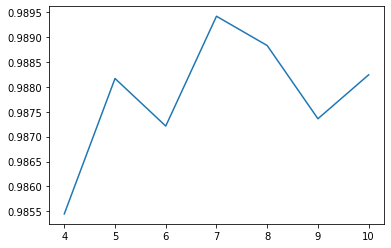

In [44]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(4,11)], accuracies)
plt.show()